In [36]:
# import packages 
import numpy as np
import datetime
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import os
from scipy.interpolate import interp1d
%matplotlib inline

# define your own folder paths and names
project_path = os.getcwd()
input_folder = os.path.join(project_path,'pv_data')
output_folder = os.path.join(project_path,'pv_data')

# file path
pv_data_raw_path = os.path.join(input_folder,'2017_pv_output.csv')

# Operating parameter
start_date = datetime.datetime(2017,3,1)
end_date = datetime.datetime(2017,3,10)

## 1. Read raw data from excel file

In [37]:
# load raw data
pv_data_raw_df = pd.read_csv(pv_data_raw_path)

# modify the time format to datetime
pv_data_df = pd.DataFrame()
pv_data_df["Time"] = pv_data_raw_df["Date"].apply(lambda x: datetime.datetime.strptime(x,"%Y-%m-%dT%H:%M:%S"))
pv_data_df["PV_output_kw"] = pv_data_raw_df["Huang_E4102_kW"]

# select sample from starting time
pv_data_df = pv_data_df[(pv_data_df['Time']>=start_date) & (pv_data_df['Time']<=end_date)]

# reset index to starting from 0 and drop the old index
pv_data_df.reset_index(drop=True, inplace=True)
pv_data_df = pv_data_df.set_index('Time')

In [38]:
pv_data_df

PV_output_kw
Time                             
2017-03-01 00:00:00     -0.084107
2017-03-01 00:01:00     -0.084733
2017-03-01 00:02:00     -0.083979
2017-03-01 00:03:00     -0.084434
2017-03-01 00:04:00     -0.084478
...                           ...
2017-03-09 23:56:00     -0.083135
2017-03-09 23:57:00     -0.083135
2017-03-09 23:58:00     -0.083135
2017-03-09 23:59:00     -0.083135
2017-03-10 00:00:00     -0.083135

[12961 rows x 1 columns]

## 2. PV data interpolation

In [39]:
def interpaverage(record_times,record_outputs):
    # Generate interpolation function with interp1d
    start_time_dt = record_times[0]
    start_time_str = datetime.datetime.strftime(start_time_dt,"%Y-%m-%dT%H:%M:%S")
    record_times = record_times.astype('datetime64[s]')
    record_times_elapsed = (record_times - np.datetime64(start_time_str)).astype('int')
    f = interp1d(record_times_elapsed, record_outputs)

    # Interpolating to every 10 seconds 
    int_times_elapsed = np.arange(0, record_times_elapsed[-1], 10)
    int_outputs = f(int_times_elapsed)
    int_datetimes = start_time_dt+int_times_elapsed*datetime.timedelta(seconds=10)
    
    # Store the interpolated RAW data into a pd series
    #pv_output_raw_int = pd.Series(int_outputs, index = int_datetimes)
    pv_output_10s_int = pd.Series(int_outputs, index = int_datetimes) 

    #### we do not need to do rolling average anymore, as the data provided is the minutely average data ####
    # rolling average every sixty points. Store in center label. Drop NA at start and finish
    #pv_output_ave = pv_output_raw_int.rolling(window = 60, center = True).mean().dropna()
    
    # Check the correct number of entries has been dropped
    #assert pv_output_ave.size == pv_output_raw_int.size - 59

    # Store to hard drive
    #pv_output_10s_int = pv_output_ave.resample('10S').first()

    # Assert all index is 10s*N
    assert np.sum((pv_output_10s_int.index.second % 10).values) == 0
    
    return pv_output_10s_int

In [40]:
record_times = np.asarray([time.to_pydatetime() for time in pv_data_df.index])
record_outputs = pv_data_df['PV_output_kw'].values

print("record_times.shape: ", record_times.shape)
print("record_outputs.shape: ", record_outputs.shape)

record_times.shape:  (12961,)
record_outputs.shape:  (12961,)


In [41]:
record_times

array([datetime.datetime(2017, 3, 1, 0, 0),
       datetime.datetime(2017, 3, 1, 0, 1),
       datetime.datetime(2017, 3, 1, 0, 2), ...,
       datetime.datetime(2017, 3, 9, 23, 58),
       datetime.datetime(2017, 3, 9, 23, 59),
       datetime.datetime(2017, 3, 10, 0, 0)], dtype=object)

In [42]:
record_outputs

array([-0.08410699, -0.08473312, -0.08397935, ..., -0.08313502,
       -0.08313502, -0.08313502])

In [43]:
pv_output_10s_int = interpaverage(record_times,record_outputs)
pv_output_10s_int

2017-03-01 00:00:00   -0.084107
2017-03-01 00:01:40   -0.084211
2017-03-01 00:03:20   -0.084316
2017-03-01 00:05:00   -0.084420
2017-03-01 00:06:40   -0.084524
                         ...   
2017-05-29 23:51:40   -0.083135
2017-05-29 23:53:20   -0.083135
2017-05-29 23:55:00   -0.083135
2017-05-29 23:56:40   -0.083135
2017-05-29 23:58:20   -0.083135
Length: 77760, dtype: float64

## 3. Plot PV profile for everyday: Visual inspection of invalid days 

plotting for date 20170301


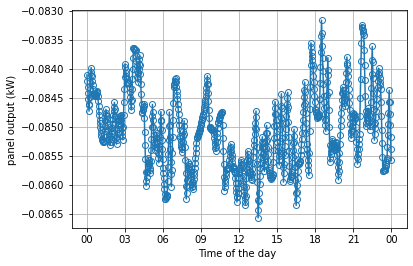

plotting for date 20170302


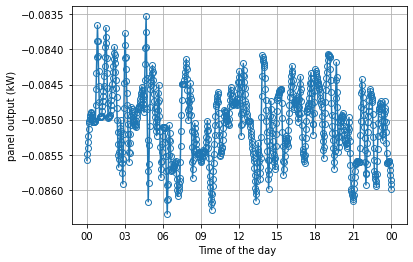

plotting for date 20170303


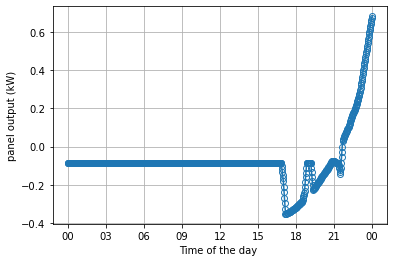

plotting for date 20170304


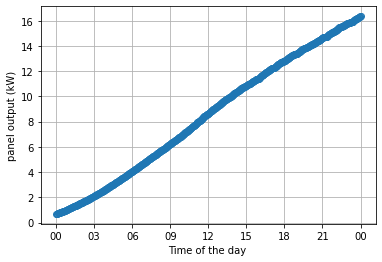

plotting for date 20170305


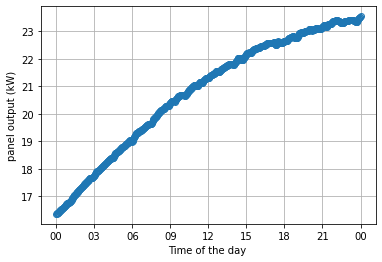

plotting for date 20170306


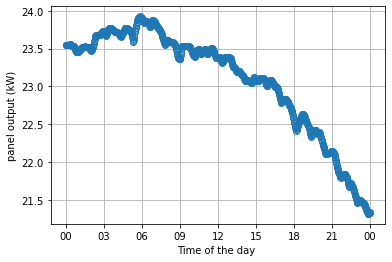

plotting for date 20170307


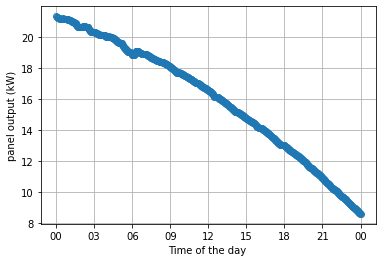

plotting for date 20170308


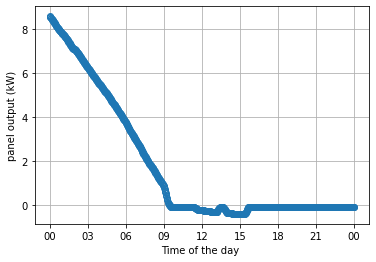

plotting for date 20170309


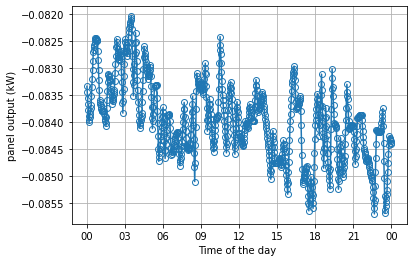

plotting for date 20170310


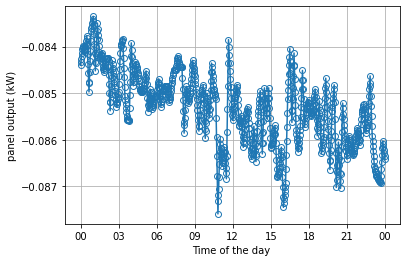

plotting for date 20170311


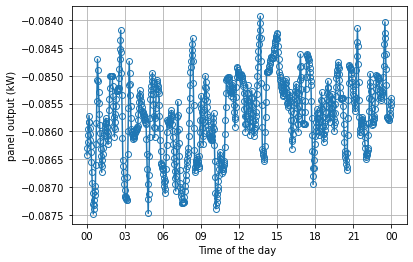

plotting for date 20170312


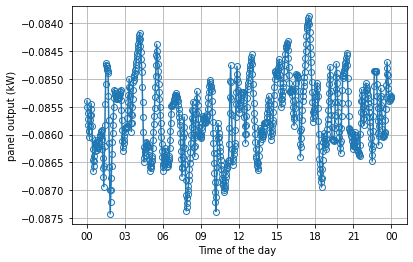

plotting for date 20170313


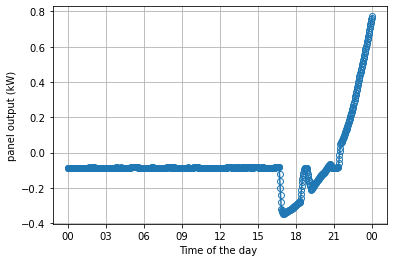

plotting for date 20170314


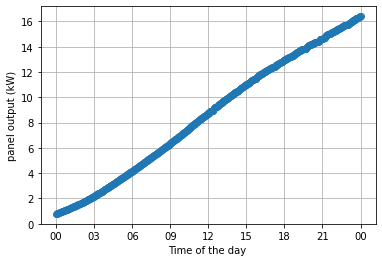

plotting for date 20170315


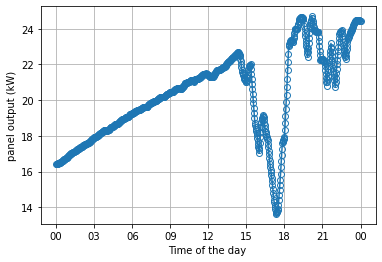

plotting for date 20170316


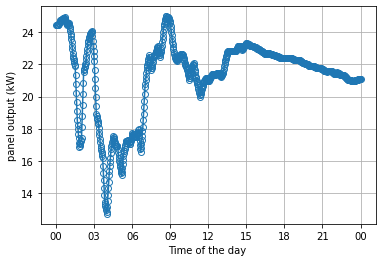

plotting for date 20170317


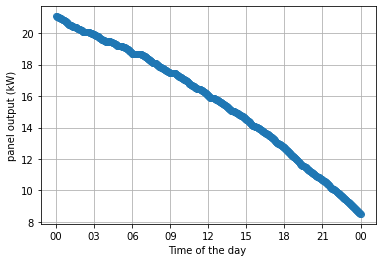

plotting for date 20170318


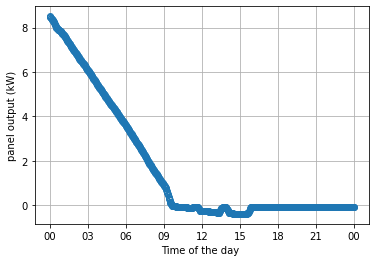

plotting for date 20170319


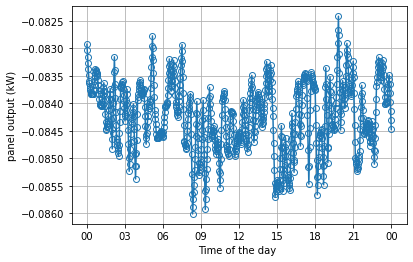

plotting for date 20170320


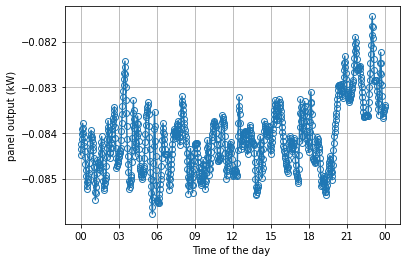

plotting for date 20170321


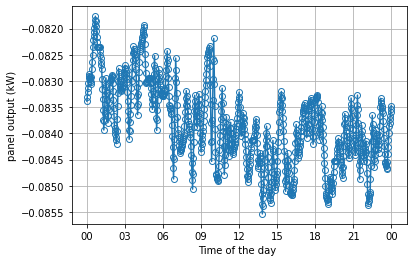

plotting for date 20170322


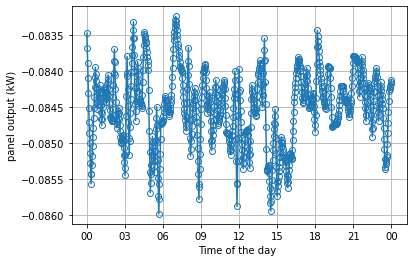

plotting for date 20170323


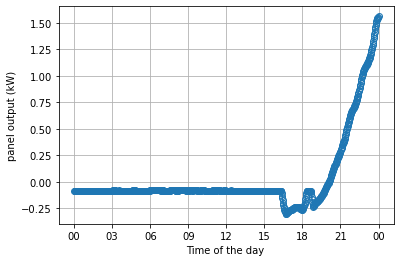

plotting for date 20170324


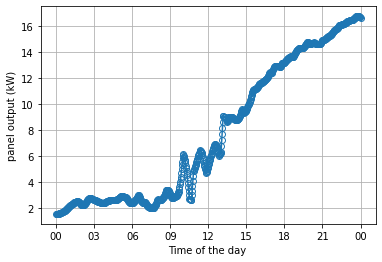

plotting for date 20170325


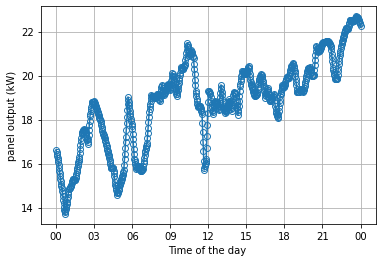

plotting for date 20170326


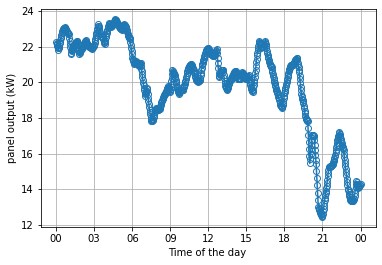

plotting for date 20170327


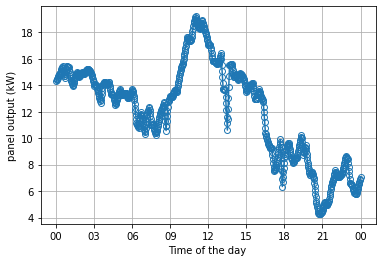

plotting for date 20170328


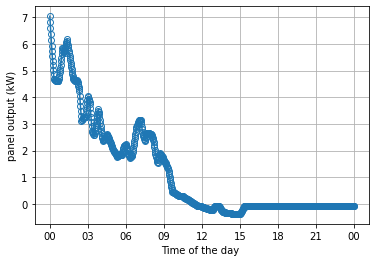

plotting for date 20170329


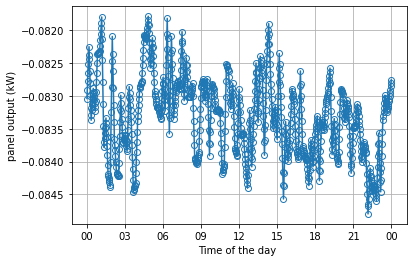

plotting for date 20170330


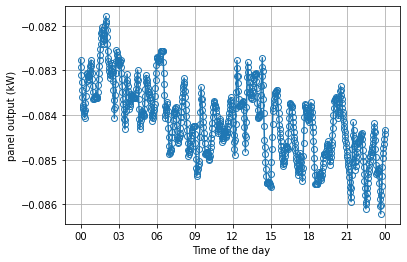

plotting for date 20170331


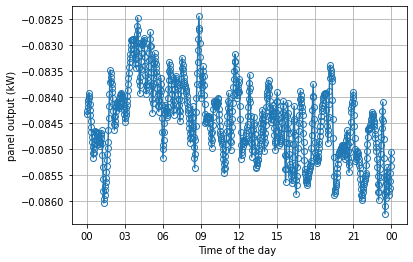

plotting for date 20170401


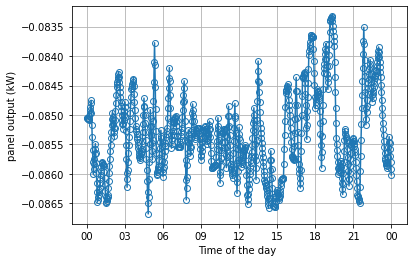

plotting for date 20170402


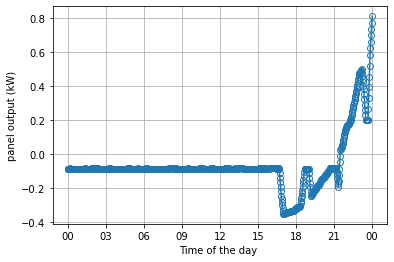

plotting for date 20170403


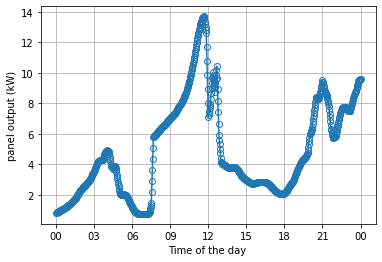

plotting for date 20170404


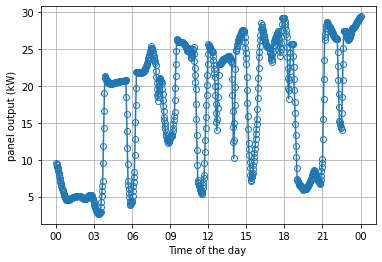

plotting for date 20170405


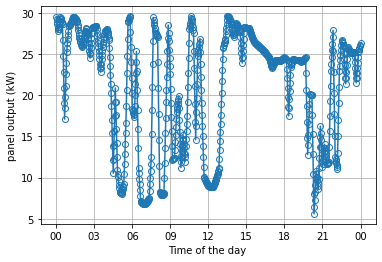

plotting for date 20170406


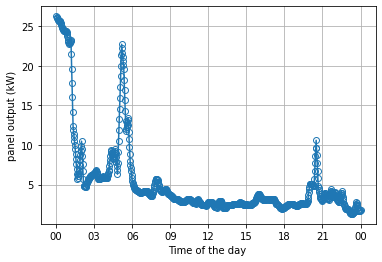

plotting for date 20170407


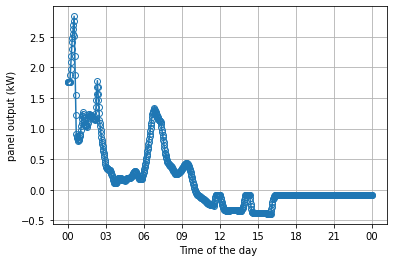

plotting for date 20170408


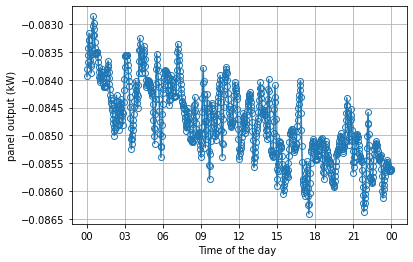

plotting for date 20170409


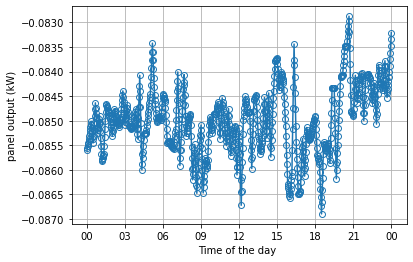

plotting for date 20170410


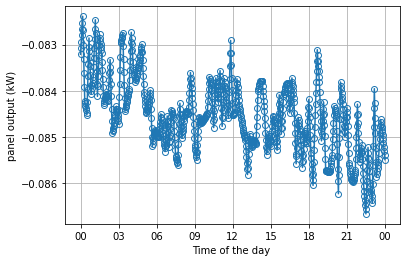

plotting for date 20170411


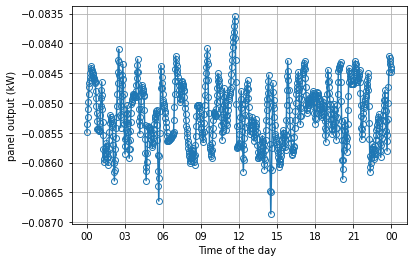

plotting for date 20170412


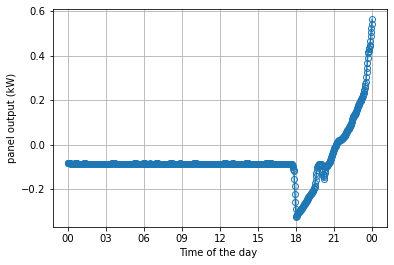

plotting for date 20170413


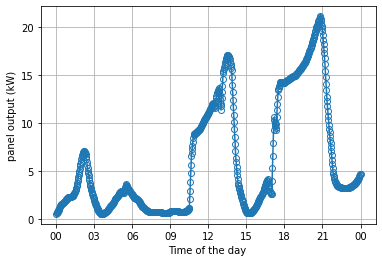

plotting for date 20170414


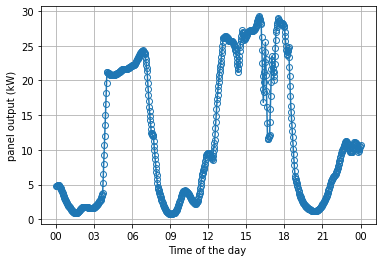

plotting for date 20170415


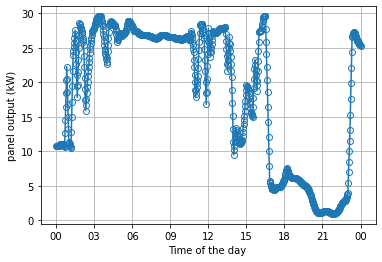

plotting for date 20170416


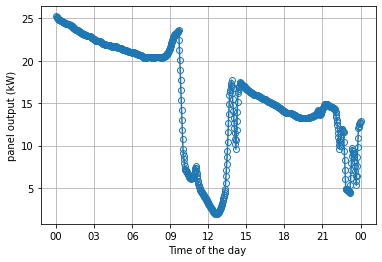

plotting for date 20170417


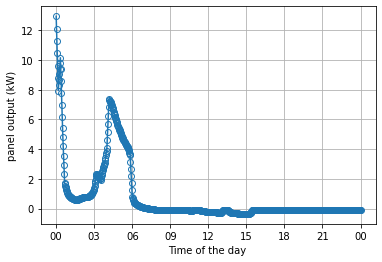

plotting for date 20170418


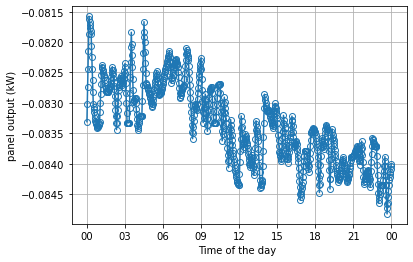

plotting for date 20170419


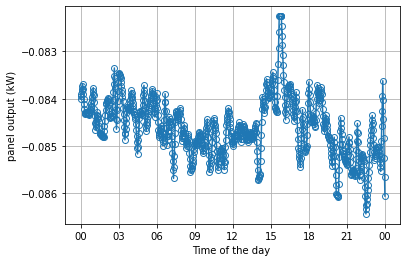

plotting for date 20170420


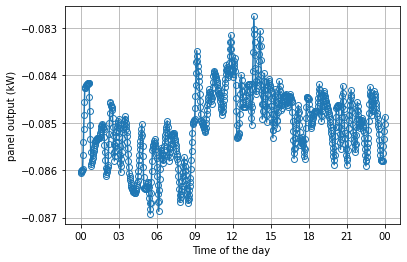

plotting for date 20170421


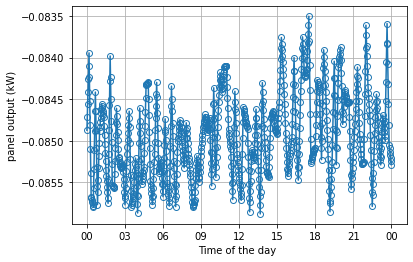

plotting for date 20170422


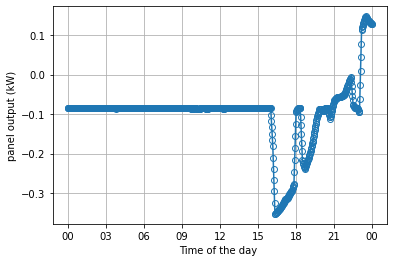

plotting for date 20170423


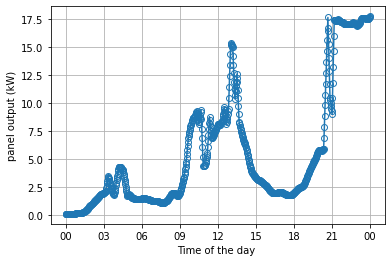

plotting for date 20170424


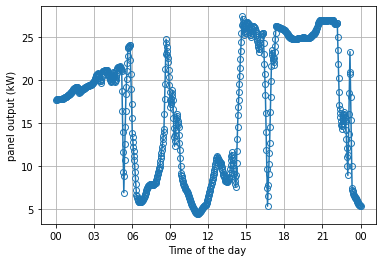

plotting for date 20170425


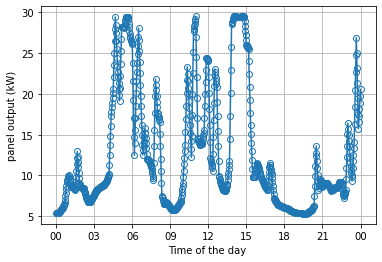

plotting for date 20170426


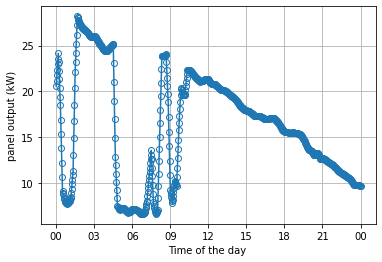

plotting for date 20170427


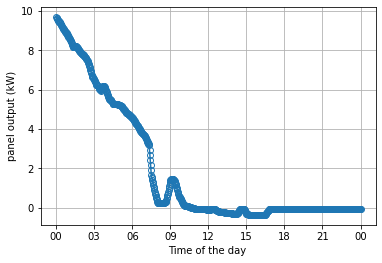

plotting for date 20170428


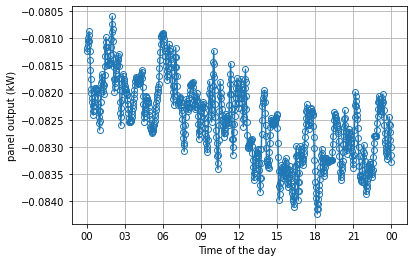

plotting for date 20170429


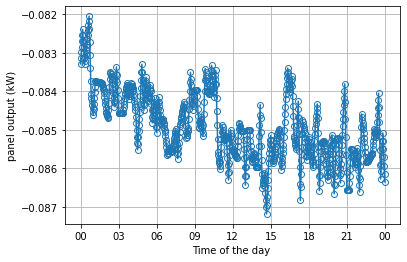

plotting for date 20170430


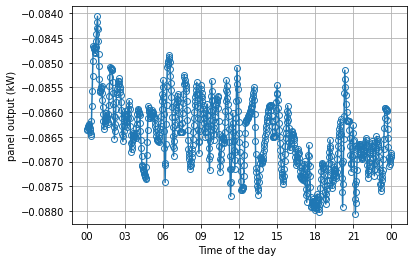

plotting for date 20170501


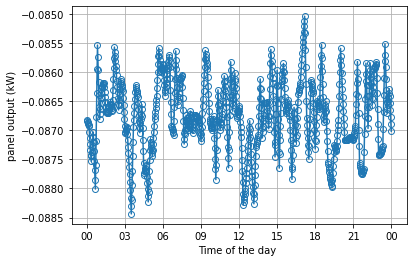

plotting for date 20170502


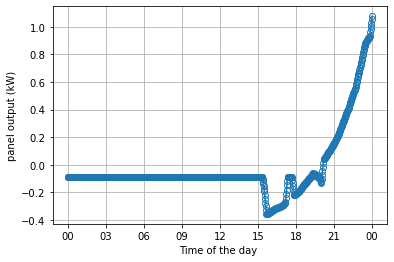

plotting for date 20170503


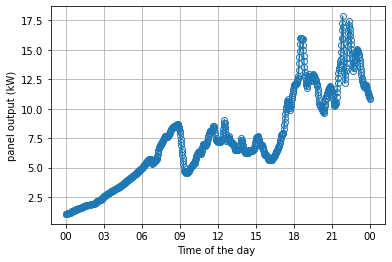

plotting for date 20170504


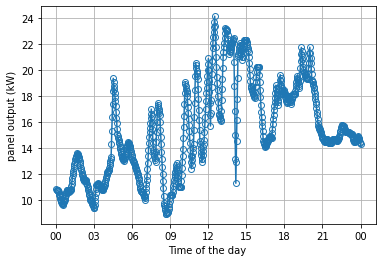

plotting for date 20170505


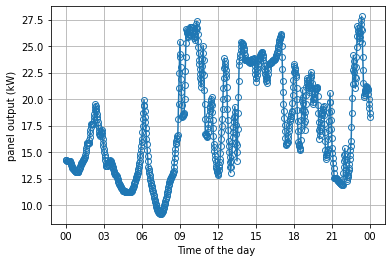

plotting for date 20170506


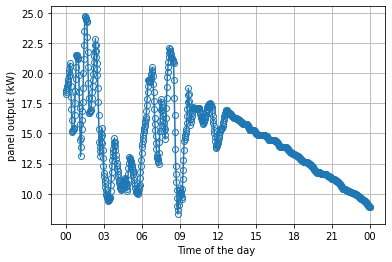

plotting for date 20170507


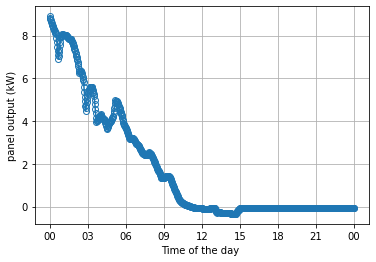

plotting for date 20170508


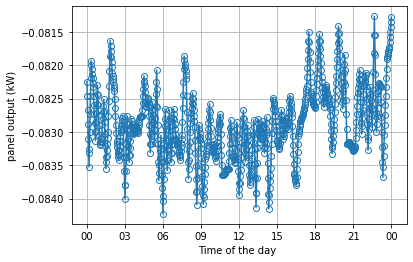

plotting for date 20170509


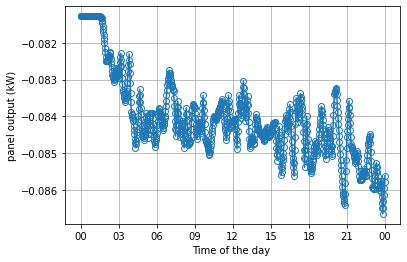

plotting for date 20170510


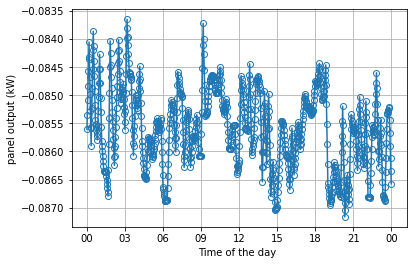

plotting for date 20170511


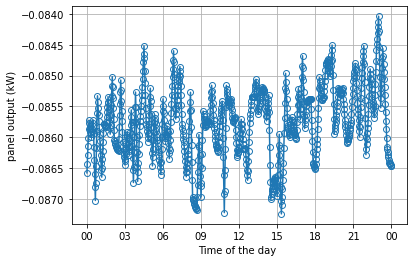

plotting for date 20170512


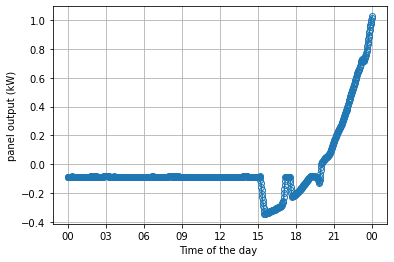

plotting for date 20170513


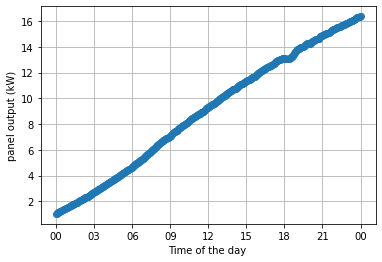

plotting for date 20170514


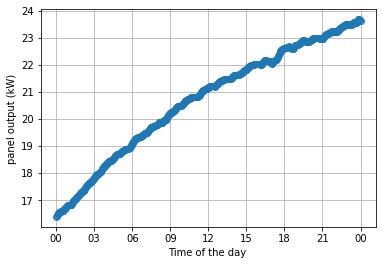

plotting for date 20170515


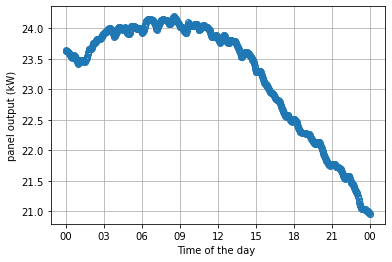

plotting for date 20170516


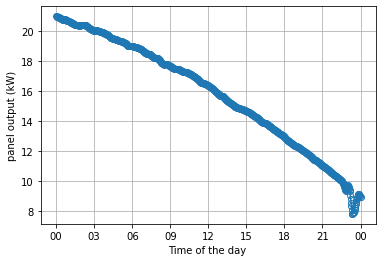

plotting for date 20170517


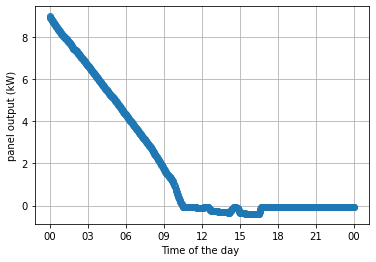

plotting for date 20170518


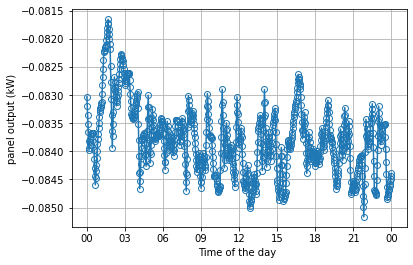

plotting for date 20170519


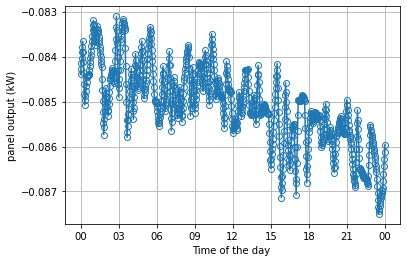

plotting for date 20170520


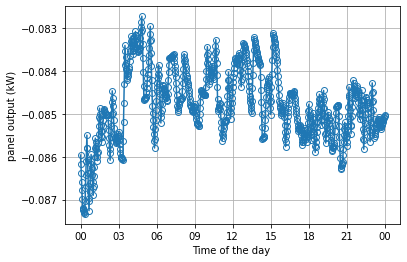

plotting for date 20170521


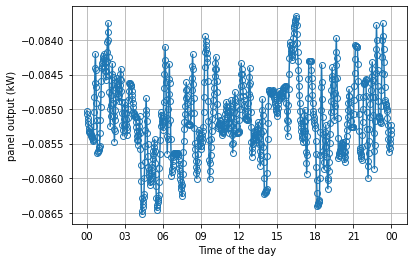

plotting for date 20170522


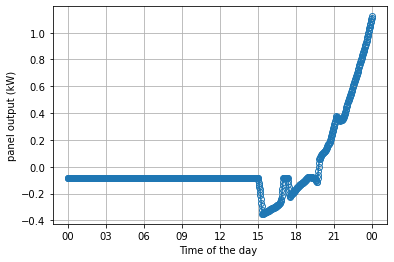

plotting for date 20170523


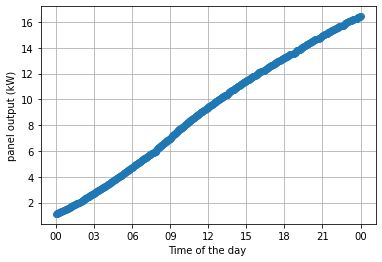

plotting for date 20170524


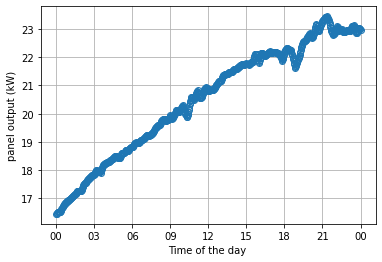

plotting for date 20170525


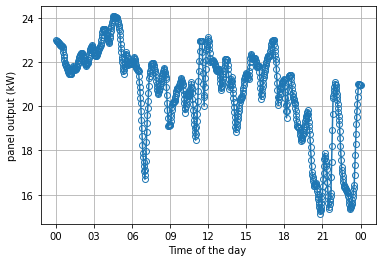

plotting for date 20170526


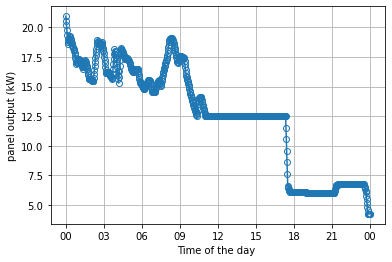

plotting for date 20170527


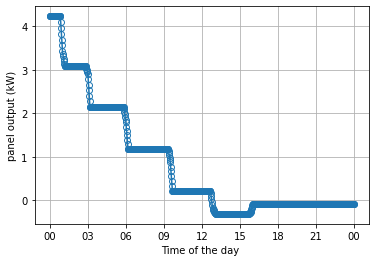

plotting for date 20170528


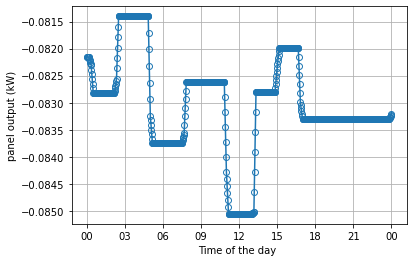

plotting for date 20170529


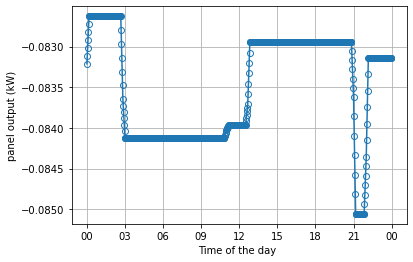

In [44]:
#  Step through the PV_data day by day 
xfmt = mdates.DateFormatter('%H')
for date in pd.date_range(start = pv_output_10s_int.index[0], end = pv_output_10s_int.index[-1],
                         freq = '1D', closed = 'left'):
    hours_xaxis = pv_output_10s_int.loc[date:date+datetime.timedelta(days = 1)].index
    pv_one_day = pv_output_10s_int.loc[date:date+datetime.timedelta(days = 1)].values
    f, ax = plt.subplots()
    print('plotting for date',date.strftime('%Y%m%d'))
    ax.plot(hours_xaxis,pv_one_day,'-o',markerfacecolor='None')
    ax.grid(True)
    ax.set_xlabel('Time of the day ')
    ax.set_ylabel('panel output (kW)')
    ax.xaxis.set_major_formatter(xfmt)
    plt.show()

In [45]:
# define invalide dates based on the curves above for sanity check
# the data is defined as invalid if the PV panel output interpolated from two points more than an hour apart
# end date is not inclusive, for the example the invalid days are [2018-9-25,2018-10-1), essentially [2018-9-25, 2018-09-30]
invalid_dates = {'start':[datetime.datetime(2017,8,1)],
                  'end':[datetime.datetime(2017,8,22)]}

## 4. Filter for invalid data

### 4.1 Missing record filter

In [46]:
# Calculate raw record interval
record_interval = record_times[1:] - record_times[:-1]

# Consider interval > 1 hour as invalid (i.e., linear interpolation for > 1 hour is invalid)
record_invalid_start = record_times[:-1][record_interval > np.timedelta64(1,'h')]
record_invalid_end = record_times[1:][record_interval > np.timedelta64(1,'h')]

missing_mask = pd.Series(False, index = pv_output_10s_int.index)

for start,end in zip(record_invalid_start, record_invalid_end):
    missing_mask.loc[start:end] = True

In [47]:
# check the invalid time stamps
for start, end in zip(record_invalid_start,record_invalid_end):
    print(start, end)

### 4.2 Night filter (PV_output<0)

In [48]:
pv_output_valid = pv_output_10s_int[(~missing_mask) & (pv_output_10s_int>0)]
pv_output_valid

2017-03-03 21:38:20    0.000266
2017-03-03 21:40:00    0.028495
2017-03-03 21:41:40    0.033525
2017-03-03 21:43:20    0.038556
2017-03-03 21:45:00    0.043587
                         ...   
2017-05-27 12:38:20    0.224436
2017-05-27 12:40:00    0.224436
2017-05-27 12:41:40    0.158392
2017-05-27 12:43:20    0.092348
2017-05-27 12:45:00    0.026304
Length: 35423, dtype: float64

plotting for date 2017-03-03


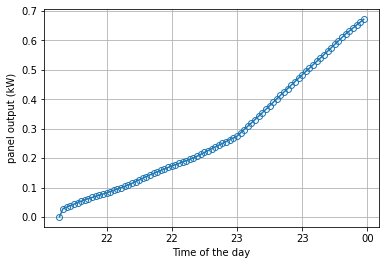

plotting for date 2017-03-04


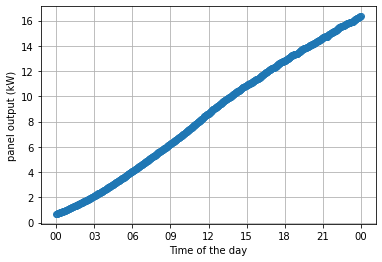

plotting for date 2017-03-05


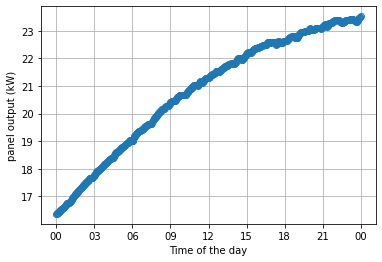

plotting for date 2017-03-06


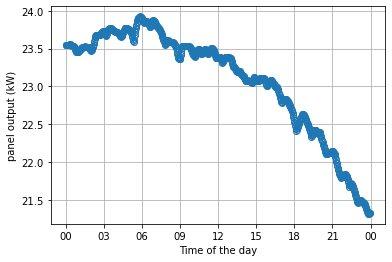

plotting for date 2017-03-07


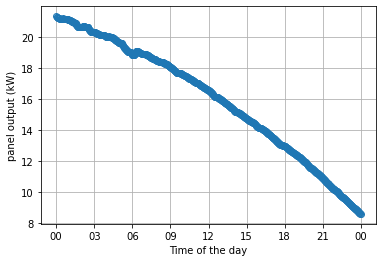

plotting for date 2017-03-08


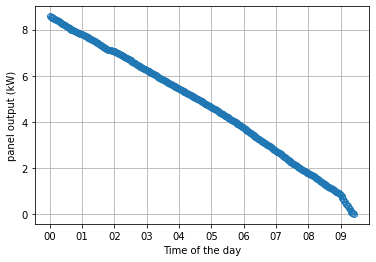

plotting for date 2017-03-13


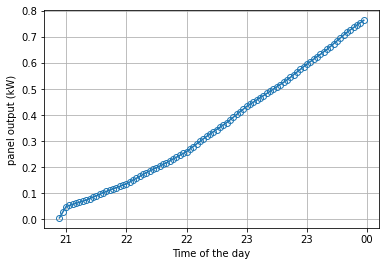

plotting for date 2017-03-14


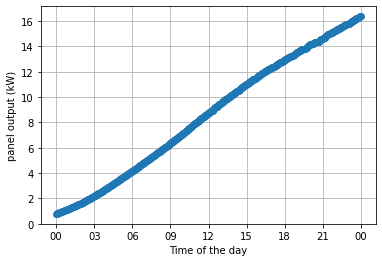

plotting for date 2017-03-15


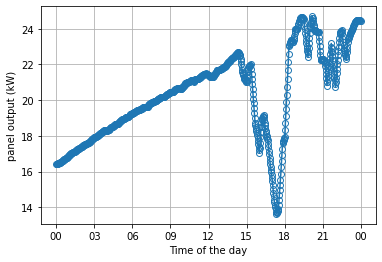

plotting for date 2017-03-16


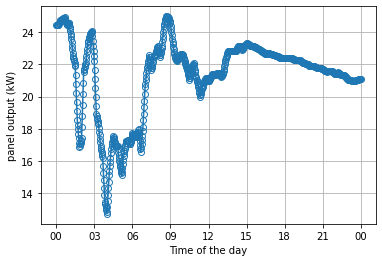

plotting for date 2017-03-17


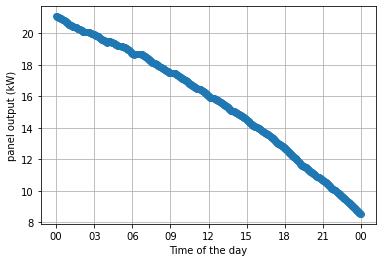

plotting for date 2017-03-18


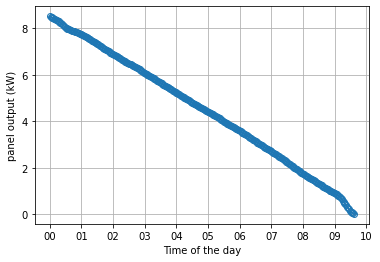

plotting for date 2017-03-23


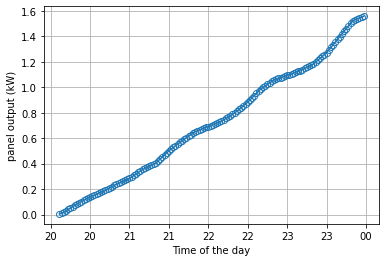

plotting for date 2017-03-24


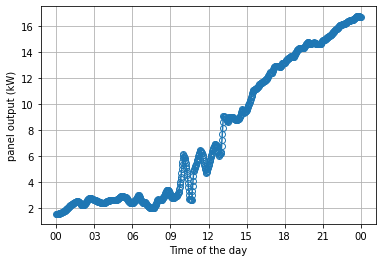

plotting for date 2017-03-25


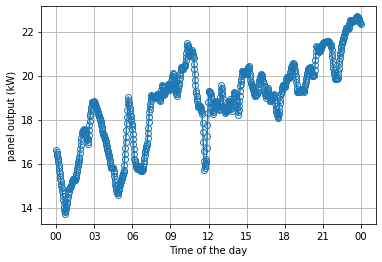

plotting for date 2017-03-26


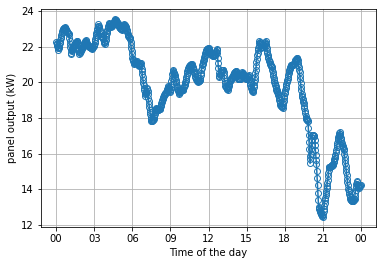

plotting for date 2017-03-27


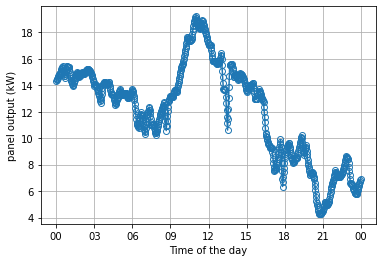

plotting for date 2017-03-28


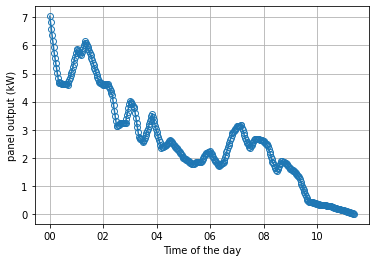

plotting for date 2017-04-02


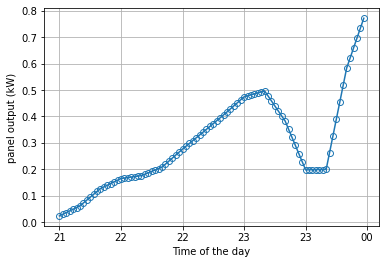

plotting for date 2017-04-03


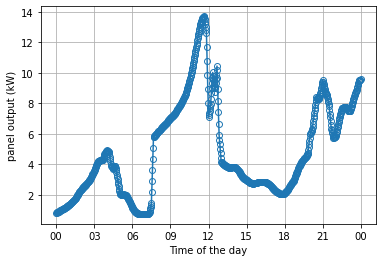

plotting for date 2017-04-04


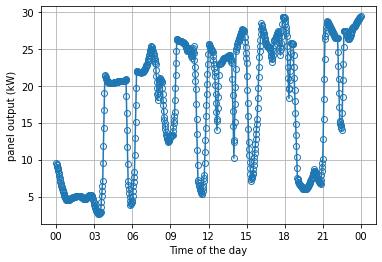

plotting for date 2017-04-05


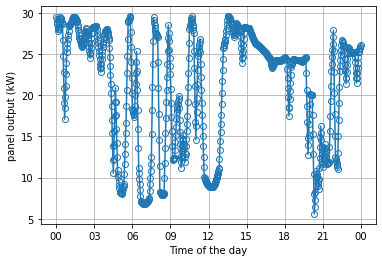

plotting for date 2017-04-06


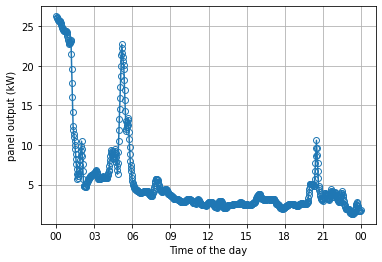

plotting for date 2017-04-07


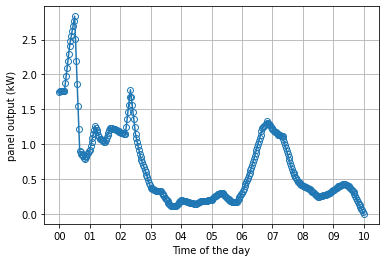

plotting for date 2017-04-12


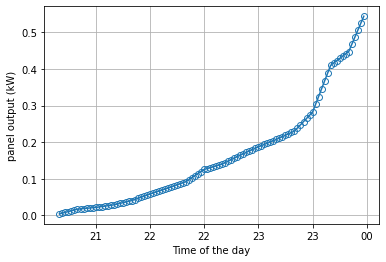

plotting for date 2017-04-13


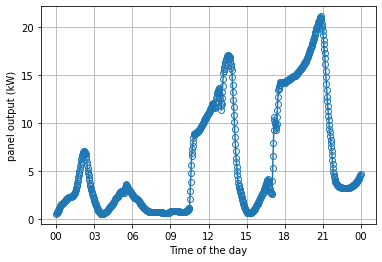

plotting for date 2017-04-14


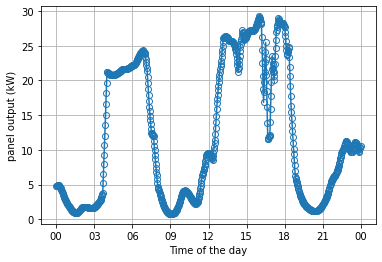

plotting for date 2017-04-15


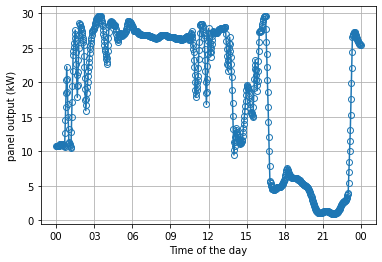

plotting for date 2017-04-16


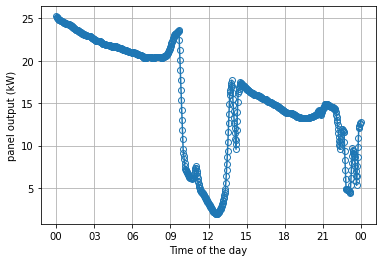

plotting for date 2017-04-17


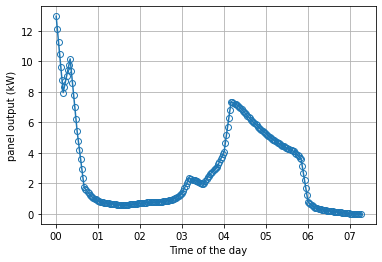

plotting for date 2017-04-22


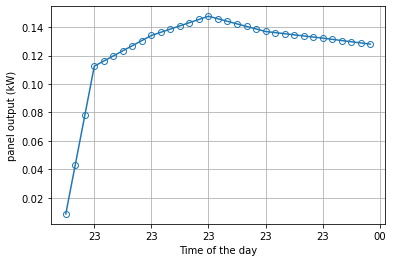

plotting for date 2017-04-23


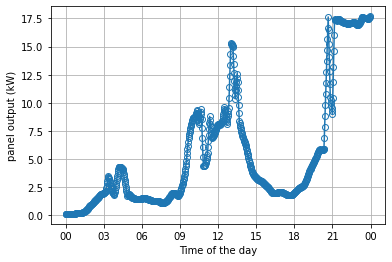

plotting for date 2017-04-24


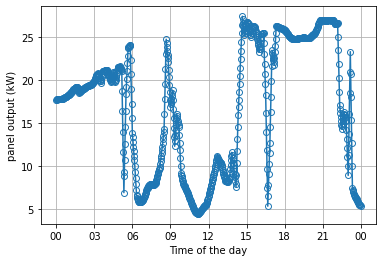

plotting for date 2017-04-25


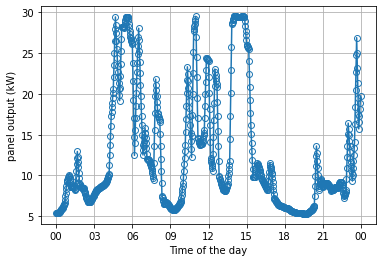

plotting for date 2017-04-26


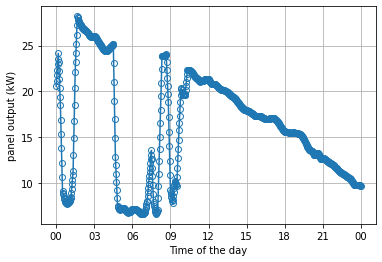

plotting for date 2017-04-27


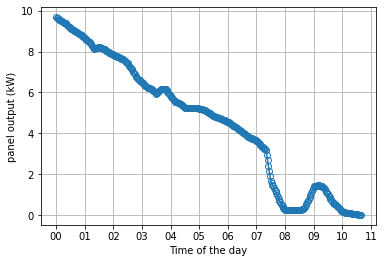

plotting for date 2017-05-02


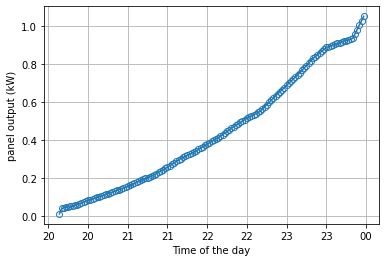

plotting for date 2017-05-03


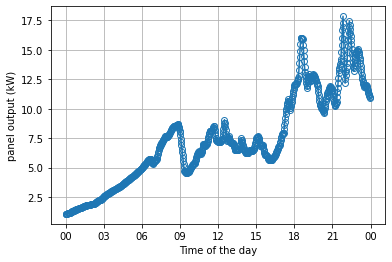

plotting for date 2017-05-04


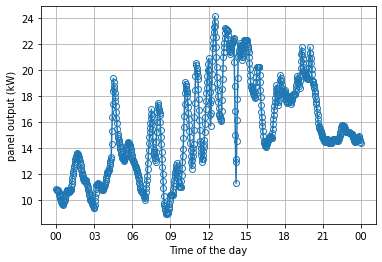

plotting for date 2017-05-05


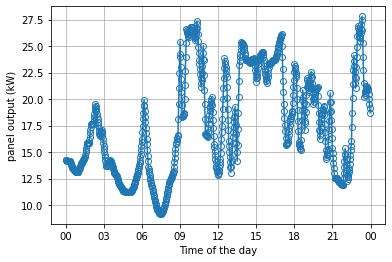

plotting for date 2017-05-06


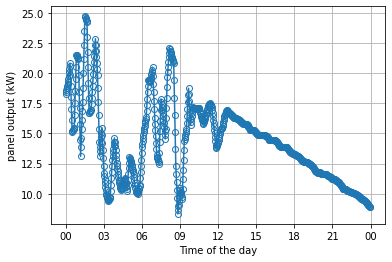

plotting for date 2017-05-07


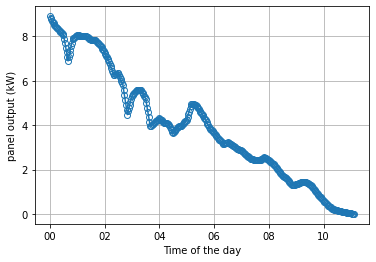

plotting for date 2017-05-12


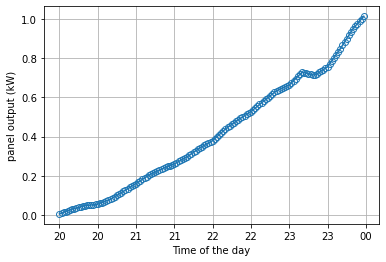

plotting for date 2017-05-13


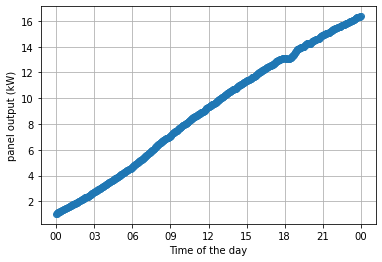

plotting for date 2017-05-14


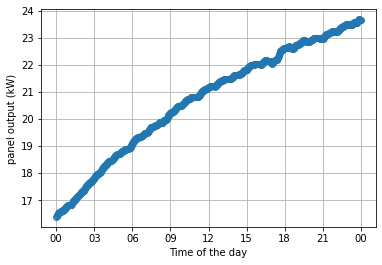

plotting for date 2017-05-15


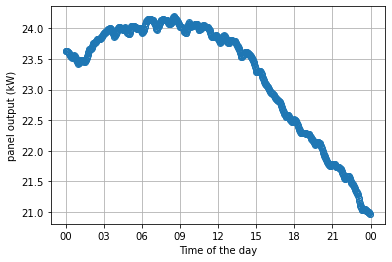

plotting for date 2017-05-16


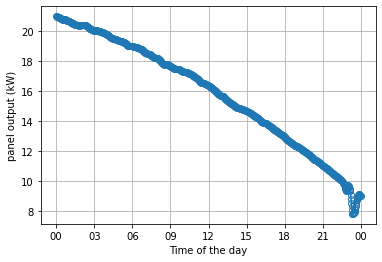

plotting for date 2017-05-17


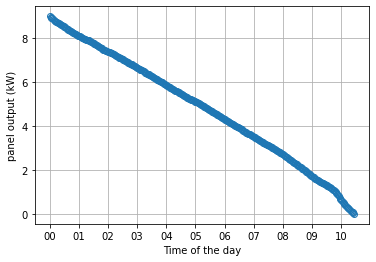

plotting for date 2017-05-22


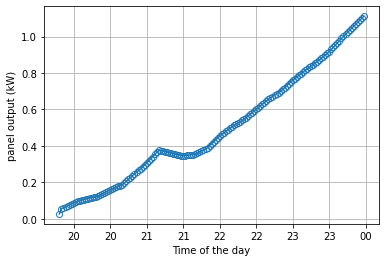

plotting for date 2017-05-23


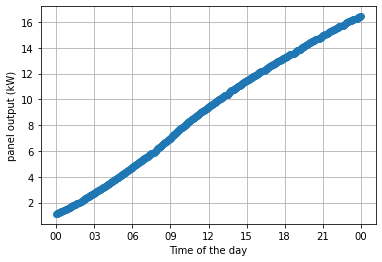

plotting for date 2017-05-24


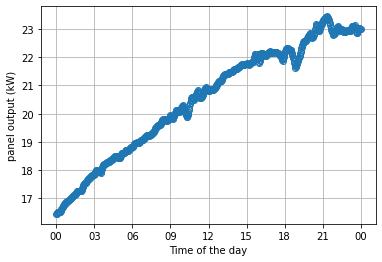

plotting for date 2017-05-25


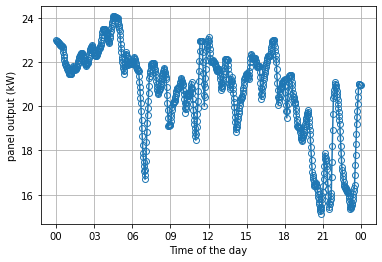

plotting for date 2017-05-26


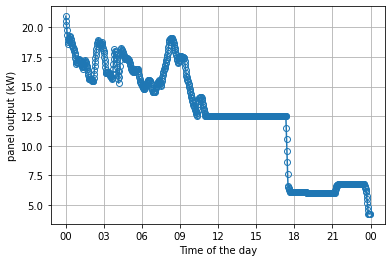

plotting for date 2017-05-27


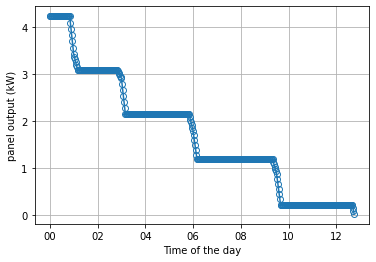

In [49]:
#  Inspect again for the valid data
xfmt = mdates.DateFormatter('%H')
all_times = pv_output_valid.index
all_pv = pv_output_valid.values
all_dates = np.asarray([times.date() for times in all_times])
unique_dates = np.unique(all_dates)

for date in unique_dates:
    idx = np.where(all_dates==date)[0]
    time_one_day = all_times[idx]
    pv_one_day = all_pv[idx]
    f, ax = plt.subplots()
    print('plotting for date',date.strftime('%Y-%m-%d'))
    ax.plot(time_one_day,pv_one_day,'-o',markerfacecolor='None')
    ax.grid(True)
    ax.set_xlabel('Time of the day')
    ax.set_ylabel('panel output (kW)')
    ax.xaxis.set_major_formatter(xfmt)
    plt.show()

In [12]:
# Store the PV output record. Freq = 10s
pv_output_valid.to_pickle(os.path.join(output_folder,'pv_output_valid.pkl'))